In [115]:
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [78]:
iris = load_iris(as_frame=True)
df = iris.frame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [79]:
df['target_flower'] = df['target'].apply(lambda x: 'setosa' if x==1 else 'versicolor' if x==2 else 'virginica')

In [80]:
df.target.unique()

array([0, 1, 2])

In [81]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [82]:
df.shape

(150, 6)

<img height='300' width='300' align='center' src='iris_image.jpg' style='display: block; margin: 0 auto'/>

### Data Visualization

<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

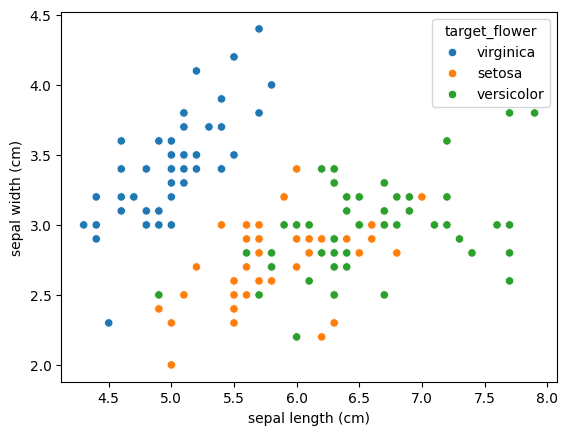

In [83]:
sns.scatterplot(df, x='sepal length (cm)', y='sepal width (cm)', hue='target_flower')

<AxesSubplot: xlabel='petal length (cm)', ylabel='petal width (cm)'>

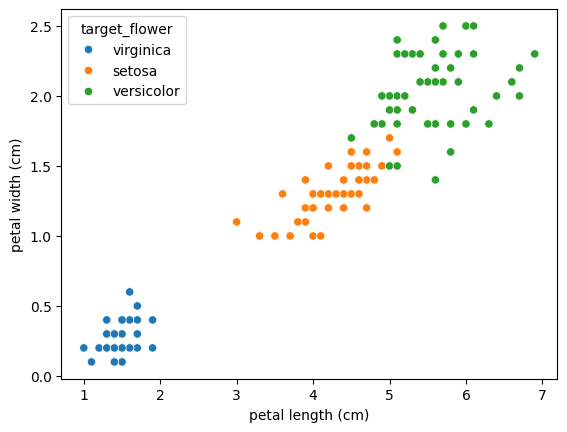

In [85]:
sns.scatterplot(df, x='petal length (cm)', y='petal width (cm)', hue='target_flower'

### Model Evaluation

In [107]:
X = df.drop(['target_flower', 'target'], axis=1)
y = df['target_flower']

#Segregating the Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logi_model = LogisticRegression()

#Training the model
logi_model.fit(X_train, y_train)

#Predicting the values
y_pred = logi_model.predict(X_test)

logi_model.score(X_test, y_test) #100% ??????????

1.0

In [110]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 9,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 10]], dtype=int64)

Text(50.722222222222214, 0.5, 'True Values')

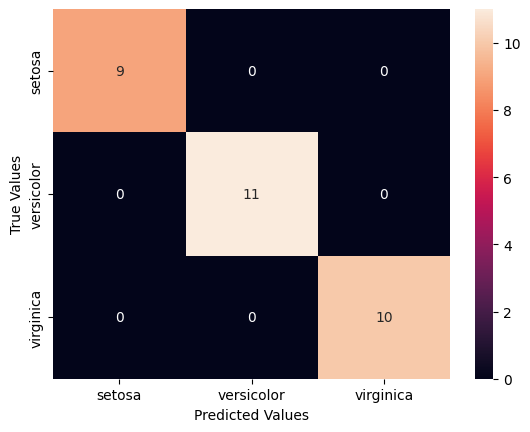

In [116]:
sns.heatmap(conf_mat, annot=True, xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')